In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

!pip3 install nb_black

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")
%load_ext nb_black

from datetime import datetime

Defaulting to user installation because normal site-packages is not writeable


<IPython.core.display.Javascript object>

In [4]:
customer = pd.read_csv(
    r"C:\Users\yadav\Documents\New folder\Customer Acqusition.csv",
    usecols=["Customer", "Age", "City", "Product", "Limit", "Company", "Segment"],
)
spend = pd.read_csv(
    r"C:\Users\yadav\Documents\New folder\spend.csv",
    usecols=["Customer", "Month", "Type", "Amount"],
)
repay = pd.read_csv(
    r"C:\Users\yadav\Documents\New folder\Repayment.csv",
    usecols=["Customer", "Month", "Amount"],
)

<IPython.core.display.Javascript object>

In [5]:
customer.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


<IPython.core.display.Javascript object>

In [6]:
repay.head()


,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88


<IPython.core.display.Javascript object>

In [7]:
spend.head()

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46
3,A1,25-Jan-04,FOOD,484342.47
4,A1,17-Jan-05,CAMERA,369694.07


<IPython.core.display.Javascript object>

# EDA

In [8]:
print(customer.shape)
print(repay.shape)
spend.shape

(100, 7)
(1523, 3)


(1500, 4)

<IPython.core.display.Javascript object>

In [9]:
spend.dtypes

Customer     object
Month        object
Type         object
Amount      float64
dtype: object

<IPython.core.display.Javascript object>

In [10]:
customer.dtypes

Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

<IPython.core.display.Javascript object>

In [11]:
repay.dtypes

Customer     object
Month        object
Amount      float64
dtype: object

<IPython.core.display.Javascript object>

In [12]:
spend.isnull().sum()

Customer    0
Month       0
Type        0
Amount      0
dtype: int64

<IPython.core.display.Javascript object>

In [13]:
customer.isnull().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

<IPython.core.display.Javascript object>

In [14]:
repay.isnull().sum()

Customer    23
Month       23
Amount      23
dtype: int64

<IPython.core.display.Javascript object>

In [15]:
repay.dropna(inplace=True)


<IPython.core.display.Javascript object>

# 1. In the above dataset,
 a.In case age is less than 18, replace it with mean of age values.
    
 b.In case spend amount is more than the limit, replace it with 50% of that customer’s limit. 
    (customer’s limit provided in acquisition table is the per transaction limit on his card)

 c. Incase the repayment amount is more than the limit, replace the repayment with the 
limit.

In [102]:
customer.loc[customer["Age"] < 18,"Age"] = customer["Age"].mean()


<IPython.core.display.Javascript object>

In [19]:
customer["meAge"].an()


48.399399999999986

<IPython.core.display.Javascript object>

In [20]:
customer.loc[customer["Age"] < 18,"Age"]


Series([], Name: Age, dtype: float64)

<IPython.core.display.Javascript object>

In [103]:
customer_spend = pd.merge(left=customer, right=spend, how="inner")

<IPython.core.display.Javascript object>

In [22]:
customer_spend

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,139018.26
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,284521.06
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,90184.22


<IPython.core.display.Javascript object>

In [23]:
customer_spend[customer_spend["Amount"] > customer_spend['Limit']]


,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Jan-04,RENTAL,199554.72
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,28-Feb-05,TRAIN TICKET,376887.49
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,6-Apr-04,BUS TICKET,439648.53
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,23-Nov-04,PETRO,384078.73
22,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Sep-05,JEWELLERY,117089.16
...,...,...,...,...,...,...,...,...,...,...
1486,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,30-Mar-06,RENTAL,483886.62
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,139018.26
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,284521.06
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,90184.22


<IPython.core.display.Javascript object>

In [24]:
customer_spend.loc[customer_spend["Amount"] > customer_spend["Limit"],"Amount"] = (50 * customer_spend["Limit"]).div(100)


<IPython.core.display.Javascript object>

In [25]:
customer_spend[customer_spend["Amount"] > customer_spend['Limit']].sum().sum()


0.0

<IPython.core.display.Javascript object>

In [26]:
#merging customer and spend table on the basis of "Customer" column (b)

customer_repay = pd.merge(left=repay,right=customer,on="Customer",how="inner")


<IPython.core.display.Javascript object>

In [27]:
customer_repay

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
0,A1,12-Jan-04,495414.75,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,3-Jan-04,245899.02,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,15-Jan-04,259490.06,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,A1,25-Jan-04,437555.12,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,A1,17-Jan-05,165972.88,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...
1495,A7,22-Nov-05,55108.71,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,A7,3-Dec-05,429700.12,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,A7,23-Feb-05,344628.72,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1498,A7,31-Mar-06,336264.37,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


<IPython.core.display.Javascript object>

In [28]:
customer_repay.loc[
    customer_repay["Amount"] > customer_repay["Limit"], "Amount"
] = customer_repay["Limit"]

<IPython.core.display.Javascript object>

In [29]:
customer_repay[customer_repay["Amount"] > customer_repay["Limit"]]


,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment


<IPython.core.display.Javascript object>

# 2. From the above dataset create the following summaries:
 a. How many distinct customers exist?
 
 b. How many distinct categories exist?
 
 c. What is the average monthly spend by customers?
 
 d. What is the average monthly repayment by customers?


In [30]:
customer["Customer"].nunique()

100

<IPython.core.display.Javascript object>

In [31]:
customer["Segment"].value_counts()


Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64

<IPython.core.display.Javascript object>

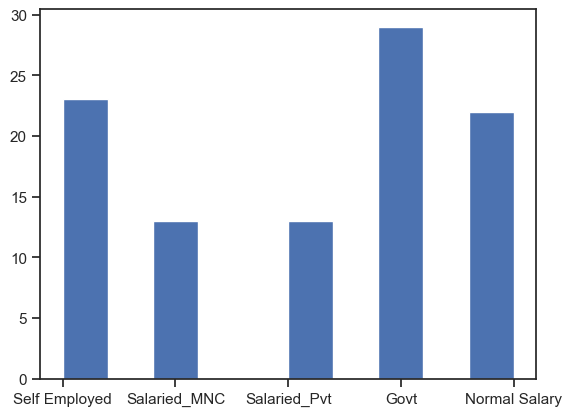

<IPython.core.display.Javascript object>

In [32]:
plt.hist("Segment", data=customer)
plt.show()

In [33]:
print(
    "We can see from the countplot that number of distinct categories are",
    customer["Segment"].nunique(),
)

We can see from the countplot that number of distinct categories are 5


<IPython.core.display.Javascript object>

In [34]:
# converting Month column of "spend" table to date time format
spend['Month'] = pd.to_datetime(spend['Month'])


<IPython.core.display.Javascript object>

In [35]:
spend.dtypes

Customer            object
Month       datetime64[ns]
Type                object
Amount             float64
dtype: object

<IPython.core.display.Javascript object>

In [36]:
spend['year'] = pd.DatetimeIndex(spend['Month']).year
spend['monthly'] = pd.DatetimeIndex(spend['Month']).month


<IPython.core.display.Javascript object>

In [37]:
spend

,Customer,Month,Type,Amount,year,monthly
0,A1,2004-01-12,JEWELLERY,485470.80,2004,1
1,A1,2004-01-03,PETRO,410556.13,2004,1
2,A1,2004-01-15,CLOTHES,23740.46,2004,1
3,A1,2004-01-25,FOOD,484342.47,2004,1
4,A1,2005-01-17,CAMERA,369694.07,2005,1
...,...,...,...,...,...,...
1495,A67,2006-02-04,BUS TICKET,356872.73,2006,2
1496,A68,2006-03-25,BUS TICKET,204971.10,2006,3
1497,A69,2006-03-31,BUS TICKET,50449.44,2006,3
1498,A70,2006-03-23,BUS TICKET,80593.94,2006,3


<IPython.core.display.Javascript object>

In [38]:
customer_spend_group = round(
    spend.groupby(by=["year", "monthly"], axis=0).mean(), 2
).reset_index()

<IPython.core.display.Javascript object>

In [39]:
customer_spend_group

,year,monthly,Amount
0,2004,1,251712.07
1,2004,2,221215.27
2,2004,3,232146.12
3,2004,4,235272.04
4,2004,5,217539.24
5,2004,9,310923.38
6,2004,11,270486.40
7,2005,1,292741.37
8,2005,2,229802.28
9,2005,4,252181.33


<IPython.core.display.Javascript object>

(d) What is the average monthly repayment by customers?


In [40]:
repay.head(2)


,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02


<IPython.core.display.Javascript object>

In [41]:
repay["Month"] = pd.to_datetime(repay["Month"])


<IPython.core.display.Javascript object>

In [42]:
repay.head(2)


,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02


<IPython.core.display.Javascript object>

In [43]:
#creating new columns which show "Month" and "Year"
repay['Monthly'] = repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
repay['Yearly'] = repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))


<IPython.core.display.Javascript object>

In [44]:
customer_repay_group= round(repay.groupby(['Yearly','Monthly']).mean(),2)


<IPython.core.display.Javascript object>

In [45]:
customer_repay_group


Amount
Yearly Monthly             
2004   April      259141.68
       February   256702.63
       January    243489.65
       March      252585.28
       May        226162.72
       November   209592.24
       September  184487.85
2005   April      212688.63
       August     264430.92
       December   320379.34
       February   238829.27
       January    240548.10
       July       239871.48
       June       210199.82
       May        263207.37
       November   256695.12
       October    219849.96
       September  247700.17
2006   April      275472.25
       August     224143.99
       December   252736.57
       February   284489.57
       January    293475.39
       July       257936.38
       June       251990.45
       March      240851.27
       May        256920.88
       November   199399.20
       October    260765.48
       September  262533.88

<IPython.core.display.Javascript object>

(e) If the monthly rate of interest is 2.9%, what is the profit for the bank for each month

In [46]:
# merging all the three tables. Alreaady merged customer and spend table in 'customer_spend'. Using "customer_spend" and "repay"
# table to form the final "customer_spend_repay" table
customer_spend_repay = pd.merge(left=customer_spend,right=repay,on="Customer",how="inner")


<IPython.core.display.Javascript object>

In [47]:
customer_spend_repay.head()


,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Amount_x,Month_y,Amount_y,Monthly,Yearly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-12,495414.75,January,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-03,245899.02,January,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-15,259490.06,January,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-25,437555.12,January,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2005-01-17,165972.88,January,2005


<IPython.core.display.Javascript object>

In [48]:
# renaming the columns for clearity
customer_spend_repay.rename(
    columns={"Amount_x": "Spend_Amount", "Amount_y": "Repay_Amount"}, inplace=True
)

<IPython.core.display.Javascript object>

In [49]:
customer_spend_repay.head()



,Customer,Age,City,Product,Limit,Company,Segment,Month_x,Type,Spend_Amount,Month_y,Repay_Amount,Monthly,Yearly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-12,495414.75,January,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-03,245899.02,January,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-15,259490.06,January,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2004-01-25,437555.12,January,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.8,2005-01-17,165972.88,January,2005


<IPython.core.display.Javascript object>

In [50]:
interest_group = customer_spend_repay.groupby(["Yearly","Monthly"])['Spend_Amount','Repay_Amount'].sum()


C:\Users\yadav\AppData\Local\Temp\ipykernel_18668\3436766760.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  interest_group = customer_spend_repay.groupby(["Yearly","Monthly"])['Spend_Amount','Repay_Amount'].sum()


<IPython.core.display.Javascript object>

In [51]:
interest_group

Spend_Amount  Repay_Amount
Yearly Monthly                              
2004   April      1.194516e+08  2.285403e+08
       February   7.613922e+07  1.602419e+08
       January    1.088357e+09  1.699210e+09
       March      5.594171e+07  8.974470e+07
       May        8.800456e+07  1.411594e+08
       November   5.504612e+07  7.860290e+07
       September  5.144278e+07  8.016122e+07
2005   April      9.366405e+07  1.747894e+08
       August     1.361400e+08  2.477449e+08
       December   4.348638e+07  9.944533e+07
       February   5.890557e+08  9.416163e+08
       January    1.324129e+08  1.810333e+08
       July       3.995653e+07  7.997268e+07
       June       1.174019e+08  2.213774e+08
       May        7.149030e+08  1.099197e+09
       November   1.532278e+08  2.763119e+08
       October    3.140993e+07  6.027830e+07
       September  3.195551e+07  7.530449e+07
2006   April      3.229722e+08  6.093666e+08
       August     5.849630e+07  7.167032e+07
       December   4.585222e+07  7.087702e+07
       February   1.654843e+08  2.903280e+08
       January    5.127574e+07  8.974491e+07
       July       1.444093e+08  2.245720e+08
       June       5.302118e+07  6.914431e+07
       March      7.393854e+08  1.115725e+09
       May        3.297954e+08  5.434823e+08
       November   1.124836e+08  1.355832e+08
       October    5.285823e+07  7.890924e+07
       September  5.395681e+07  8.083199e+07

<IPython.core.display.Javascript object>

In [52]:
interest_group["Monthly Profit"] = (
    interest_group["Repay_Amount"] - interest_group["Spend_Amount"]
)

<IPython.core.display.Javascript object>

In [53]:
interest_group["intrest earned"] = (2.9 * interest_group["Monthly Profit"]).div(100)

<IPython.core.display.Javascript object>

In [54]:
interest_group


Spend_Amount  Repay_Amount  Monthly Profit  intrest earned
Yearly Monthly                                                              
2004   April      1.194516e+08  2.285403e+08    1.090887e+08    3.163572e+06
       February   7.613922e+07  1.602419e+08    8.410268e+07    2.438978e+06
       January    1.088357e+09  1.699210e+09    6.108525e+08    1.771472e+07
       March      5.594171e+07  8.974470e+07    3.380298e+07    9.802865e+05
       May        8.800456e+07  1.411594e+08    5.315485e+07    1.541491e+06
       November   5.504612e+07  7.860290e+07    2.355678e+07    6.831466e+05
       September  5.144278e+07  8.016122e+07    2.871844e+07    8.328349e+05
2005   April      9.366405e+07  1.747894e+08    8.112539e+07    2.352636e+06
       August     1.361400e+08  2.477449e+08    1.116049e+08    3.236542e+06
       December   4.348638e+07  9.944533e+07    5.595895e+07    1.622810e+06
       February   5.890557e+08  9.416163e+08    3.525606e+08    1.022426e+07
       January    1.324129e+08  1.810333e+08    4.862042e+07    1.409992e+06
       July       3.995653e+07  7.997268e+07    4.001615e+07    1.160468e+06
       June       1.174019e+08  2.213774e+08    1.039755e+08    3.015290e+06
       May        7.149030e+08  1.099197e+09    3.842944e+08    1.114454e+07
       November   1.532278e+08  2.763119e+08    1.230841e+08    3.569438e+06
       October    3.140993e+07  6.027830e+07    2.886837e+07    8.371827e+05
       September  3.195551e+07  7.530449e+07    4.334898e+07    1.257121e+06
2006   April      3.229722e+08  6.093666e+08    2.863944e+08    8.305437e+06
       August     5.849630e+07  7.167032e+07    1.317402e+07    3.820465e+05
       December   4.585222e+07  7.087702e+07    2.502480e+07    7.257193e+05
       February   1.654843e+08  2.903280e+08    1.248436e+08    3.620465e+06
       January    5.127574e+07  8.974491e+07    3.846917e+07    1.115606e+06
       July       1.444093e+08  2.245720e+08    8.016271e+07    2.324719e+06
       June       5.302118e+07  6.914431e+07    1.612313e+07    4.675707e+05
       March      7.393854e+08  1.115725e+09    3.763400e+08    1.091386e+07
       May        3.297954e+08  5.434823e+08    2.136869e+08    6.196920e+06
       November   1.124836e+08  1.355832e+08    2.309955e+07    6.698869e+05
       October    5.285823e+07  7.890924e+07    2.605102e+07    7.554795e+05
       September  5.395681e+07  8.083199e+07    2.687518e+07    7.793803e+05

<IPython.core.display.Javascript object>

In [55]:
# top 5 product 
spend["Type"].value_counts().head(5)

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:>

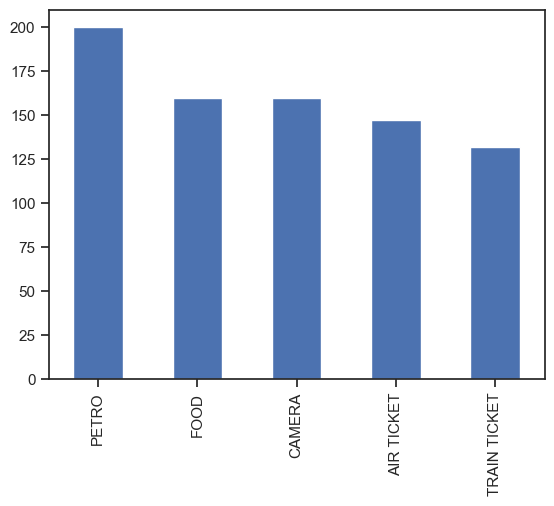

<IPython.core.display.Javascript object>

In [56]:
spend["Type"].value_counts().head(5).plot(kind="bar")

In [57]:
customer_spend.head()


,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07


<IPython.core.display.Javascript object>

In [58]:
city_spend = customer_spend.groupby(by="City")["Amount"].sum()

<IPython.core.display.Javascript object>

In [59]:
city_spend

City
BANGALORE     40461647.02
BOMBAY        28603127.38
CALCUTTA      41108132.30
CHENNAI       22128635.65
COCHIN        45963513.50
DELHI         10918286.54
PATNA         15260586.97
TRIVANDRUM    15337155.87
Name: Amount, dtype: float64

<IPython.core.display.Javascript object>

<AxesSubplot:ylabel='Amount'>

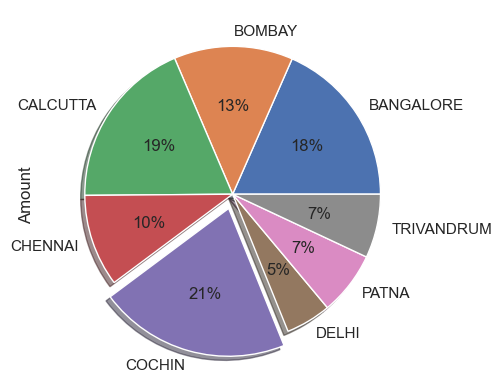

<IPython.core.display.Javascript object>

In [60]:
city_spend.plot(
    kind="pie",
    autopct="%1.00f%%",
    shadow=True,
    explode=[0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0],
)

In [61]:
print("From above pie chart we can see that Cochin is having maximum spend.")


From above pie chart we can see that Cochin is having maximum spend.


<IPython.core.display.Javascript object>

In [62]:
customer_spend["Age Group"] =  pd.cut(customer_spend["Age"],bins=np.arange(18,88,8),labels=["18-26","26-34", "34-42" ,"42-50" ,"50-58","58-66","66-74","74-82"],include_lowest=True)


<IPython.core.display.Javascript object>

In [63]:
customer_spend


,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,74-82
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13,74-82
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46,74-82
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47,74-82
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07,74-82
...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66,50-58
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00,50-58
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,5000.50,50-58
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00,34-42


<IPython.core.display.Javascript object>

In [64]:
# grouping data based on "Age Group" and finding the amount spend by each age group and arranging in descending oreder
age_spend = (
    customer_spend.groupby("Age Group")["Amount"].sum().sort_values(ascending=False)
)

<IPython.core.display.Javascript object>

In [65]:
age_spend.reset_index()

,Age Group,Amount
0,42-50,53242390.70
1,34-42,38037826.50
2,26-34,30553459.81
3,18-26,25233896.65
4,50-58,22454066.68
5,74-82,19770884.32
6,66-74,17705877.44
7,58-66,12782683.13


<IPython.core.display.Javascript object>

In [66]:
print("From above table we can say that age group 42 - 50 is spending more money")

From above table we can say that age group 42 - 50 is spending more money


<IPython.core.display.Javascript object>

In [67]:
# top 10 customers in terms of repayment?
customer_repay.head()


,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
0,A1,12-Jan-04,495414.75,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,3-Jan-04,245899.02,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,15-Jan-04,259490.06,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,A1,25-Jan-04,437555.12,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,A1,17-Jan-05,165972.88,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


<IPython.core.display.Javascript object>

In [68]:
customer_repay.groupby(by="Customer")["Amount"].sum().sort_values(
    ascending=False
).reset_index()

,Customer,Amount
0,A61,10539142.91
1,A60,9876290.74
2,A13,9572000.66
3,A43,8489871.46
4,A45,8448334.87
...,...,...
95,A83,10002.00
96,A99,10002.00
97,A98,10001.00
98,A97,10000.00


<IPython.core.display.Javascript object>

In [69]:
# converting "Month" column to date time
customer_spend

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,74-82
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13,74-82
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46,74-82
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47,74-82
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07,74-82
...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,25-Jan-04,BIKE,54729.66,50-58
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,5000.00,50-58
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,5000.50,50-58
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,5001.00,34-42


<IPython.core.display.Javascript object>

In [70]:
#converting "Month" column to date time 
customer_spend["Month"] = pd.to_datetime(customer_spend["Month"])


<IPython.core.display.Javascript object>

In [71]:
customer_spend["Yearly"] = pd.DatetimeIndex(customer_spend["Month"]).year

<IPython.core.display.Javascript object>

In [72]:
customer_spend_pivot = pd.pivot_table(
    data=customer_spend,
    values="Amount",
    index=["City", "Yearly"],
    columns="Product",
    aggfunc="sum",
)

<IPython.core.display.Javascript object>

In [73]:
customer_spend_pivot

Product                   Gold    Platimum      Silver
City       Yearly                                     
BANGALORE  2004     9289878.54  1112732.30  1291852.58
           2005    12892362.99   912284.97   830612.34
           2006    12030611.09   685831.27  1415480.94
BOMBAY     2004     6987853.53   897264.94   532089.03
           2005     8983018.28   711804.94   508988.54
           2006     7917144.31   972130.01  1092833.80
CALCUTTA   2004     7477140.98  2037690.30   500006.00
           2005    10303355.80  4434696.31   440147.06
           2006    11167532.77  3589606.66  1157956.42
CHENNAI    2004     1059618.50  3535652.38   282056.86
           2005     3740945.58  5053956.32   377184.49
           2006     2704288.62  5024923.40   350009.50
COCHIN     2004     7315850.15  3419904.07   814229.62
           2005    12110613.03  4960921.71   652269.38
           2006    10499142.38  4920592.29  1269990.87
DELHI      2004     2806495.00   283512.89   768172.30
           2005     1964845.27   494157.86   612311.21
           2006     2957103.32   176788.72   854899.97
PATNA      2004     2072567.90  1113069.60   756684.10
           2005     3252615.77  2883231.07   950094.19
           2006     2276181.69  1256137.65   700005.00
TRIVANDRUM 2004     2415102.84  2161676.67   209667.48
           2005     1240375.85  3601443.30   269912.99
           2006     2735710.87  2147403.75   555862.12

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='City,Yearly'>

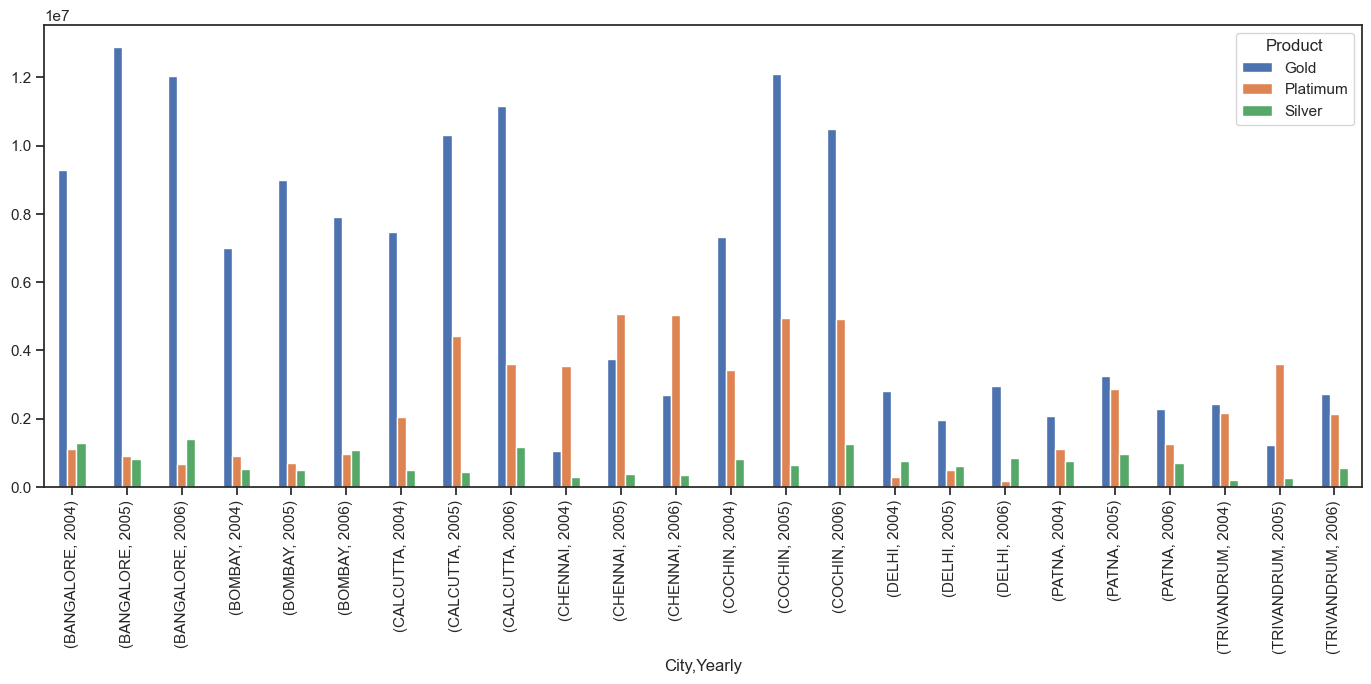

<IPython.core.display.Javascript object>

In [74]:
customer_spend_pivot.plot(kind="bar", figsize=[17, 6])

# 4. Create graphs for
 a. Monthly comparison of total spends, city wise
 
 b. Comparison of yearly spend on air tickets
 
 c. Comparison of monthly spend for each product (look for any seasonality
 that exists in terms of spend)

In [75]:
customer_spend


,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group,Yearly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,2004
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,2004
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,74-82,2004
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,74-82,2004
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,74-82,2005
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,2004-01-25,BIKE,54729.66,50-58,2004
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,2004-01-12,AUTO,5000.00,50-58,2004
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,2004-01-03,SHOPPING,5000.50,50-58,2004
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,2004-01-15,AIR TICKET,5001.00,34-42,2004


<IPython.core.display.Javascript object>

In [76]:
customer_spend["Monthly"] = customer_spend["Month"].apply(
    lambda x: pd.Timestamp.strftime(x, format="%B")
)

<IPython.core.display.Javascript object>

In [77]:
month_city = (
    customer_spend.groupby(["Monthly", "City"])[["Amount"]]
    .sum()
    .sort_index()
    .reset_index()
)

<IPython.core.display.Javascript object>

In [78]:
month_city

,Monthly,City,Amount
0,April,BANGALORE,4207980.48
1,April,BOMBAY,1873785.01
2,April,CALCUTTA,3457507.95
3,April,CHENNAI,2518656.99
4,April,COCHIN,3882744.94
...,...,...,...
91,September,CHENNAI,745759.40
92,September,COCHIN,1382242.90
93,September,DELHI,50001.00
94,September,PATNA,70329.95


<IPython.core.display.Javascript object>

In [79]:
month_city =pd.pivot_table(data=customer_spend,values='Amount',index='City',columns='Monthly',aggfunc='sum')


<IPython.core.display.Javascript object>

In [80]:
month_city


Monthly,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90
DELHI,777240.75,155402.16,842342.02,1494064.06,2714261.45,50001.50,511276.09,2267149.02,1600322.07,391610.96,64615.46,50001.00
PATNA,2338179.53,419383.64,50000.00,2353333.55,4916205.55,50000.00,746186.13,1437166.61,2136586.80,413677.87,329537.34,70329.95
TRIVANDRUM,1199293.45,453773.94,640922.26,2857123.89,3704336.99,260484.50,400336.83,2392316.51,2813534.48,143387.40,285581.92,186063.70


<IPython.core.display.Javascript object>

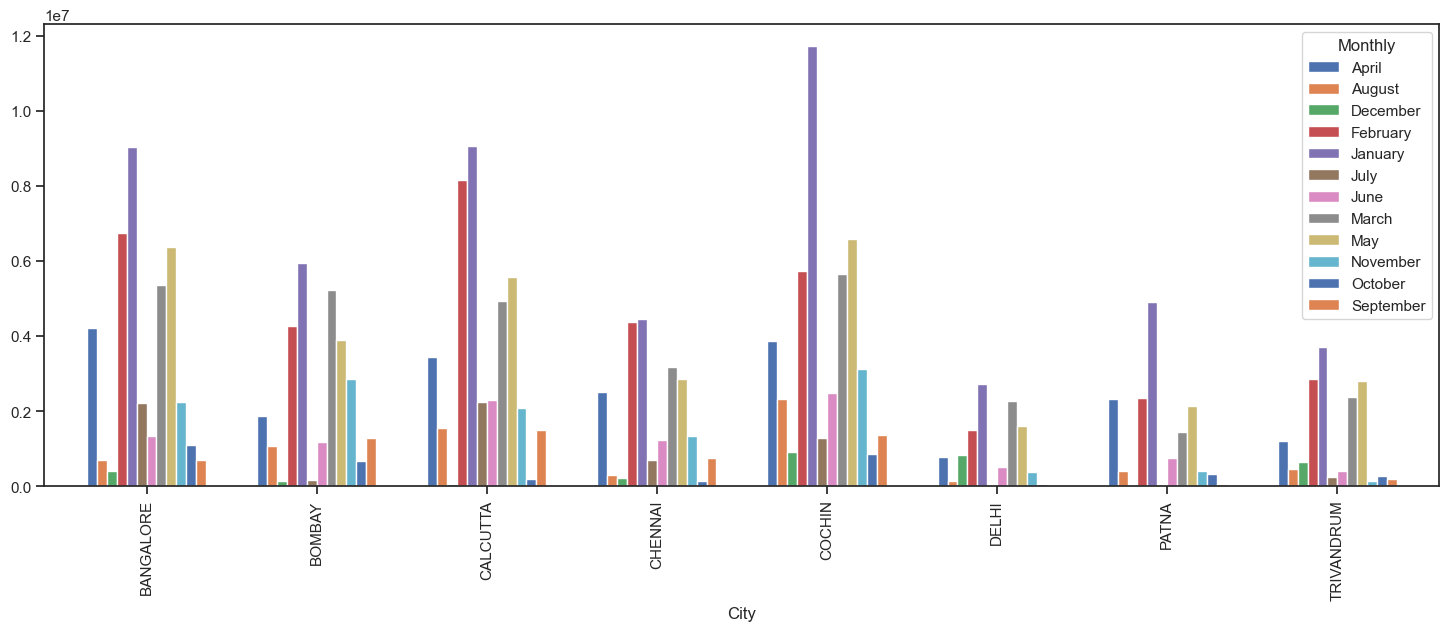

<IPython.core.display.Javascript object>

In [81]:
month_city.plot(kind="bar", figsize=(18, 6), width=0.7)
plt.show()

In [82]:
# Comparison of yearly spend on air tickets
air_tickets = customer_spend.groupby(["Yearly","Type"])[["Amount"]].sum().reset_index()


<IPython.core.display.Javascript object>

In [83]:
air_tickets


,Yearly,Type,Amount
0,2004,AIR TICKET,4357225.35
1,2004,AUTO,254745.28
2,2004,BIKE,476635.28
3,2004,BUS TICKET,5822074.21
4,2004,CAMERA,10122819.72
5,2004,CAR,2326442.62
6,2004,CLOTHES,2685429.91
7,2004,FOOD,7727298.46
8,2004,JEWELLERY,2579785.80
9,2004,MOVIE TICKET,1588392.99


<IPython.core.display.Javascript object>

In [84]:
air_ticket = air_tickets.loc[
    air_tickets.Type == "AIR TICKET", ["Yearly", "Amount"]
].reset_index()

<IPython.core.display.Javascript object>

In [85]:
air_ticket

,index,Yearly,Amount
0,0,2004,4357225.35
1,15,2005,10550152.21
2,30,2006,5248469.56


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Comparison of yearly spend on air tickets')

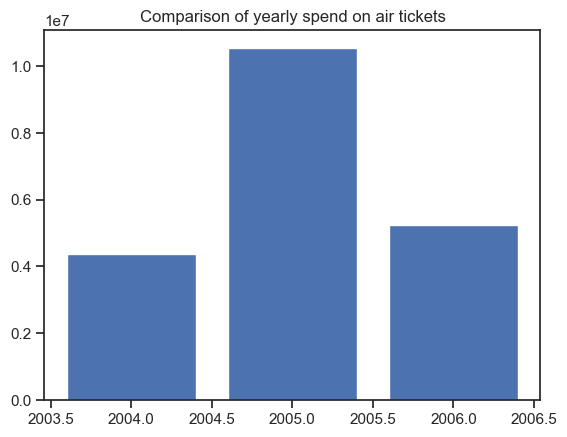

<IPython.core.display.Javascript object>

In [86]:
plt.bar(x=air_ticket["Yearly"], height=air_ticket["Amount"])
plt.xlabel = "Yearly"
plt.ylabel = "amount"
plt.title("Comparison of yearly spend on air tickets")


In [87]:
# Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)
customer_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group,Yearly,Monthly
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-12,JEWELLERY,485470.80,74-82,2004,January
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,PETRO,410556.13,74-82,2004,January
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-15,CLOTHES,23740.46,74-82,2004,January
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-25,FOOD,484342.47,74-82,2004,January
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2005-01-17,CAMERA,369694.07,74-82,2005,January


<IPython.core.display.Javascript object>

<AxesSubplot:ylabel='Frequency'>

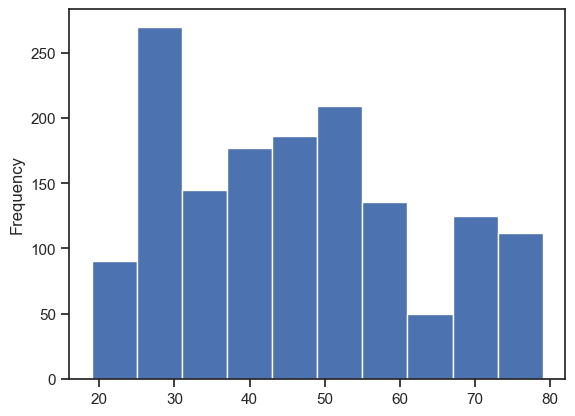

<IPython.core.display.Javascript object>

In [88]:
customer_spend["Age"].plot(kind="hist")

In [89]:
# Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)¶

product_wise = pd.pivot_table(
    data=customer_spend,
    values="Amount",
    index="Monthly",
    columns="Product",
    aggfunc="sum",
)

<IPython.core.display.Javascript object>

In [90]:
product_wise

Product,Gold,Platimum,Silver
Monthly,,,
April,13170572.59,5182493.86,1902322.65
August,4954030.42,1714762.80,293109.82
December,2332940.96,750156.19,200537.90
February,24779179.55,9134054.58,2087018.37
January,32413831.83,14951578.51,4206383.62
July,5167416.37,1288156.26,530153.72
June,6538862.64,2965712.71,689537.61
March,19256972.48,7288837.68,3909405.83
May,21548169.76,8151926.49,2140940.01


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Monthly'>

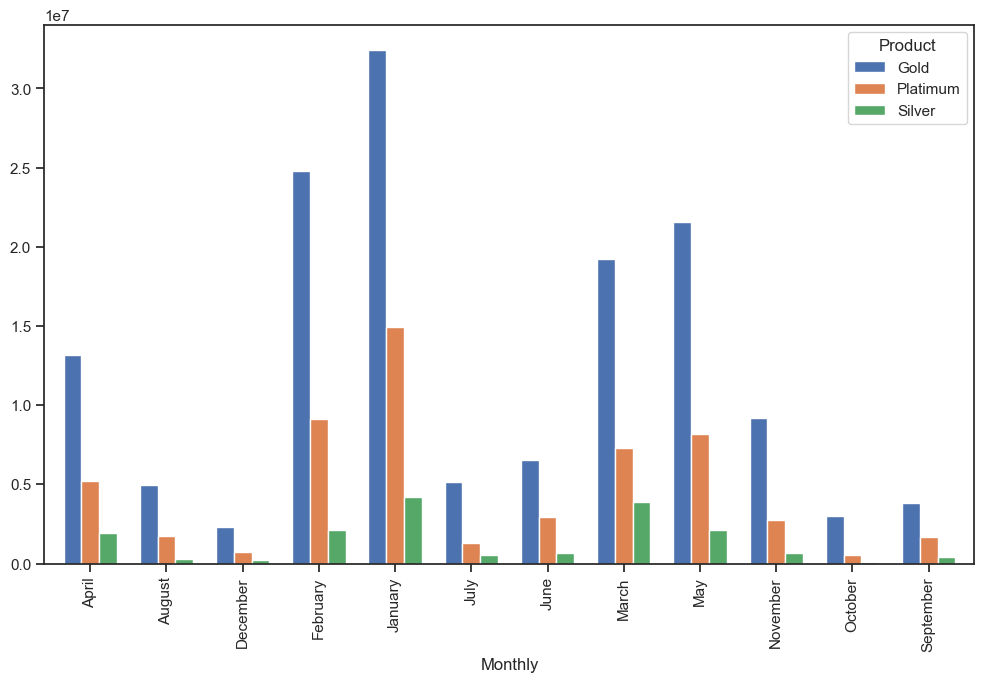

<IPython.core.display.Javascript object>

In [91]:
product_wise.plot(kind="bar", figsize=[12, 7], width=0.7)

In [92]:
highest_sales_month = customer_spend.loc[
    customer_spend.Monthly == "January", ["Amount"]
].sum()

<IPython.core.display.Javascript object>

In [93]:
print(
    f"we can see the highest sale month is jan of sales highest_sales_month {highest_sales_month}"
)

we can see the highest sale month is jan of sales highest_sales_month Amount    51571793.96
dtype: float64


<IPython.core.display.Javascript object>

In [94]:
highest_sales_month

Amount    51571793.96
dtype: float64

<IPython.core.display.Javascript object>

# (5) Write user defined PYTHON function to perform the following analysis: You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [95]:
customer_repay.head()


,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
0,A1,12-Jan-04,495414.75,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,3-Jan-04,245899.02,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,15-Jan-04,259490.06,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,A1,25-Jan-04,437555.12,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,A1,17-Jan-05,165972.88,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


<IPython.core.display.Javascript object>

In [96]:
customer_repay['Month'] = pd.to_datetime(customer_repay['Month'])


<IPython.core.display.Javascript object>

In [97]:
customer_repay["Monthly"] = customer_repay["Month"].apply(
    lambda x: pd.Timestamp.strftime(x, format="%B")
)
customer_repay["Yearly"] = customer_repay["Month"].apply(
    lambda x: pd.Timestamp.strftime(x, format="%Y")
)

<IPython.core.display.Javascript object>

In [98]:
customer_repay

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment,Monthly,Yearly
0,A1,2004-01-12,495414.75,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004
1,A1,2004-01-03,245899.02,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004
2,A1,2004-01-15,259490.06,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004
3,A1,2004-01-25,437555.12,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2004
4,A1,2005-01-17,165972.88,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,January,2005
...,...,...,...,...,...,...,...,...,...,...,...
1495,A7,2005-11-22,55108.71,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,November,2005
1496,A7,2005-12-03,100001.00,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,December,2005
1497,A7,2005-02-23,100001.00,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,February,2005
1498,A7,2006-03-31,100001.00,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,March,2006


<IPython.core.display.Javascript object>

In [99]:
def top10Customers(product_category,time_period):
        return customer_repay.loc[(customer_repay.Product == product_category)].groupby(['Customer','City','Product',time_period]).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)



<IPython.core.display.Javascript object>

In [100]:
top10Customers("Gold", "Month")

,Customer,City,Product,Month,Amount
376,A44,DELHI,Gold,2004-01-03,1105504.15
199,A26,PATNA,Gold,2006-05-06,927042.43
468,A61,COCHIN,Gold,2005-05-27,919569.37
463,A61,COCHIN,Gold,2005-02-03,915233.33
350,A42,BOMBAY,Gold,2006-05-10,887910.15
432,A60,CALCUTTA,Gold,2004-04-25,868512.38
243,A28,TRIVANDRUM,Gold,2006-03-25,866266.78
329,A42,BOMBAY,Gold,2004-01-15,846637.61
1,A1,BANGALORE,Gold,2004-01-12,845861.57
74,A13,BANGALORE,Gold,2004-01-12,835282.67


<IPython.core.display.Javascript object>

In [101]:
top10Customers("Silver", "Yearly")

,Customer,City,Product,Yearly,Amount
14,A24,DELHI,Silver,2005,1184870.98
8,A22,BOMBAY,Silver,2005,1141542.81
20,A46,PATNA,Silver,2005,1116730.89
18,A25,COCHIN,Silver,2006,1000030.00
11,A23,BANGALORE,Silver,2005,1000010.00
22,A57,TRIVANDRUM,Silver,2004,1000010.00
7,A22,BOMBAY,Silver,2004,953419.47
9,A22,BOMBAY,Silver,2006,945271.83
12,A23,BANGALORE,Silver,2006,872925.32
21,A46,PATNA,Silver,2006,839228.07


<IPython.core.display.Javascript object>